# Navigating the Multimodal Map: Insights into Foundation Models

## Day 2: Multimodal Data Integration and Visualization

#### Author: Sylwia Majchrowska

#### Course instructors: Sylwia Majchrowska and Ricardo Mokhtari, Centre for AI, DS&AI, BioPharma R&D, AstraZeneca.

![LOGO PLACEHOLDER](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/logo.jpg?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)

## Description of the hands on session

This hands-on workshop delves into the intricacies of multi-modal machine learning, focusing on the integration of data from various sources.

Similar to human physicians, automated detection and classification systems that use both medical imaging data and clinical textual data. The integration of diverse data types—spanning clinical records and medical imaging—into a cohesive analytical framework represents a significant leap forward in the development of automated detection and classification systems. By embracing a fusion paradigm, these systems can achieve a level of performance and insight that more closely aligns with the nuanced, holistic approach of human medical practitioners.

The workshop is structured into three key segments:

**1. Multimodal image registration - alignment of image modalities**

This section focuses on the alignment and harmonization of different image modalities, enabling a unified and coherent analysis of multi-modal imaging data.

**2. Data integration strategies - multimodal data fusion**

We will examine techniques for integrating and fusing data from diverse modalities, emphasizing the seamless amalgamation of information for enhanced insights.

**3. Multimodal Data Fusion Using Embeddings**

We will engage in a practical exercise aimed at combining image and text data, gaining hands-on experience in leveraging multi-modal information.

## Navigating this notebook

*This notebook is designed to be self-contained. Therefore, there are long descriptions in the markdown cells. You do not need to read all of the information here during the hadns on session. Instead, focus on running/modifying the code, and after the session detailed explanations are provided for you to go deeper into the topics.*

___

## What is a Modality?

**A definition:** Modality refers to the way in which something expressed or perceived.

![modality](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/modality.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)

## What is Multimodal?

**A dictionary definition:** Multimodal = with multiple modalities.

**A research-oriented definition:** Multimodal = the scientific study of heterogeneous and interconnected data.

![heterogenious](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/heterogenious.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)

Source: https://cmu-multicomp-lab.github.io/mmml-tutorial/icml2023/

Fun fact (McGurk effect): https://www.youtube.com/watch?v=aFPtc8BVdJk

# Part 1: Multimodal image registration - alignment of image modalities

As multimodality can be derived from a variety of sources; this part discusses image-image learning.

## Multimodal Imaging Studies

Multimodal imaging studies necessitate the co-registration of images, a critical process that involves geometrically aligning two or more images to ensure their corresponding pixels (or voxels) accurately represent the same anatomical structures. This alignment is pivotal for the integrity of subsequent quantitative image analyses. Image co-registration can be broadly classified into two categories based on the reference framework used:
- Atlas-based Registration: This approach involves aligning images to a pre-existing anatomical atlas, serving as a universal reference.
- Image-based Registration: Alternatively, this method selects one image from the set as the reference, aligning all other images to it.

The co-registration process is indispensable for ensuring accurate and meaningful analysis of multimodal imaging data. It lays the foundation for any further quantitative analysis by aligning disparate imaging modalities at a precise anatomical level. A variety of techniques are available for image registration, ranging from traditional methods to advanced deep learning (DL)-based approaches. For an in-depth exploration of these techniques, the work by [Haskins, Kruger, and Yan 2020](https://arxiv.org/abs/1903.02026) provides a comprehensive overview.

One of the quintessential applications of multimodal imaging is the fusion of structural and functional imaging modalities, such as PET-CT and PET-MR. These combinations are particularly beneficial in oncology, where molecular imaging's limited spatial resolution may not suffice to pinpoint tumor locations accurately. The integration of CT or MR imaging within the same session enhances the anatomical localization of molecular imaging findings, thereby significantly improving diagnostic accuracy and treatment planning.

<img src="https://i.ibb.co/qjyf2Z6/fig6.png"><br>
(a) CT scan, (b) Coregistered CT-MRI scan, (c) MRI scan<br><br>

## Brain Tumor Radiogenomic Classification

The goal is to develop a tool based on deep learning that automates the detection of MGMT promoter methylation in brain tumors using MRI scans.

Glioblastoma represents a formidable challenge in oncology due to its aggressive nature and poor prognosis, with median survival rates currently less than a year. A key genetic marker, MGMT promoter methylation, has emerged as a significant prognostic factor. Its presence indicates a better response to chemotherapy, making its detection crucial for effective treatment planning.

Traditionally, identifying the genetic characteristics of a tumor, such as MGMT promoter methylation, requires invasive surgical procedures to obtain tissue samples. This process is not only risky but also time-consuming, with results taking weeks to be finalized. Moreover, the initial treatment approach may necessitate further surgeries based on the genetic findings, adding to the patient's burden. Radiogenomics offers an alternative by potentially allowing the prediction of tumor genetics through non-invasive imaging techniques alone. This approach could reduce the need for multiple surgeries and enable more tailored and effective treatment strategies, ultimately improving patient outcomes.

This part is based on the [RSNA-MICCAI Brain Tumor Radiogenomic Classification Kaggle challenge](https://www.kaggle.com/competitions/rsna-miccai-brain-tumor-radiogenomic-classification/overview). Challenge organizers provided the participants with multi-parametric MRI images from two subsets, training and test, categorized by patient. Each patient's data includes images from four different scan types:
- Fluid Attenuated Inversion Recovery (FLAIR)
- T1-weighted pre-contrast (T1w)
- T1-weighted post-contrast (T1Gd)
- T2-weighted (T2).

This challenge underscores the potential of deep learning in bridging the gap between imaging and genetic analysis, offering hope for more personalized and effective brain cancer treatment strategies.

Solution source: https://www.kaggle.com/competitions/rsna-miccai-brain-tumor-radiogenomic-classification/discussion/280033

In [1]:
# first, we need to install and import libraies
!pip install pydicom efficientnet-pytorch -q

# imports
import os
import glob
import random

import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd

import pydicom
import cv2

import torch
from torch import nn
from torch.utils import data as torch_data
from torch.nn import functional as F

import efficientnet_pytorch

from torch.utils.data import Dataset, DataLoader

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.6 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount("/content/drive")

!pwd

Mounted at /content/drive
/content


In [6]:
HOME_FOLDER = '/content/drive/MyDrive/Day2/' # if mounted
# HOME_FOLDER = '/content/Day2/' # if not mounted
RSNA_DATA_FOLDER = HOME_FOLDER + 'data/'
MODELS_FOLDER = HOME_FOLDER + 'models/'

In [ ]:
#!mkdir -p /content/drive/MyDrive/Day2
#!unzip /content/drive/MyDrive/Day2.zip -d /content/drive/MyDrive/Day2/

Common configurations to be used throughout the notebook

In [7]:
#  setup training and model parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed = 123

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(seed)

#  Setup hyperparameters
class X3D:
    XS=0
    S=1
    M=2
    L=3

x3d_config = {
    'input_clip_length': [4, 13, 16, 16],
    'depth_factor': [2.2, 2.2, 2.2, 5.0],
    'width_factor': [1, 1, 1, 2.9]
}

class CFG:
    data_root = RSNA_DATA_FOLDER
    img_size = 256
    n_frames = 10

    cnn_features = 256
    lstm_hidden = 32

    n_fold = 5
    n_epochs = 10

## Understanding the Data

Each patient ID, represented by a unique identifier (e.g., “00000”), is associated with four distinct scans, derived from different pulse sequences. These scans are stored as `DICOM` files, which have a `.dcm` file extension. The DICOM standard not only facilitates the storage of the image itself but also embeds a rich set of metadata, including patient information, scan parameters.

### DICOM files
DICOM, an acronym for "Digital Imaging and Communications in Medicine," is the global standard for storing, viewing, retrieving, and sharing medical images. To work with DICOM files in a research or clinical setting, specialized DICOM viewer software is typically required. However, for computational analysis, the `PyDicom` library offers a powerful and flexible toolset for reading DICOM files directly within Python environments.

More about DICOM files: https://medium.com/@omar.ok1998/what-is-dicom-a28c5fe24c9d

In [9]:
path = os.path.join(CFG.data_root, 'test', '00001', "FLAIR", 'Image-1.dcm')  # provide your path to selected dicom file
dicom = pydicom.dcmread(path)
print(dicom)

Dataset.file_meta -------------------------------
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.10516666458097416251658300058457999086
(0008,0050) Accession Number                    SH: '00001'
(0008,0060) Modality                            CS: 'MR'
(0008,103E) Series Description                  LO: 'FLAIR'
(0010,0010) Patient's Name                      PN: '00001'
(0010,0020) Patient ID                          LO: '00001'
(0018,0023) MR Acquisition Type                 CS: '3D'
(0018,0050) Slice Thickness                     DS: '1.2'
(0018,0081) Echo Time                           DS: None
(0018,0082) Inversion Tim

In [13]:
def load_dicom(path):
    dicom = pydicom.dcmread(path)
    data = dicom.pixel_array
    data = data - np.min(data)
    if np.max(data) != 0:
        data = data / np.max(data)

    data = np.float32(cv2.resize(data, (CFG.img_size, CFG.img_size)))
    return torch.tensor(data)

def visualize_sample(
    brats21id,
    slice_i,
    types=("FLAIR", "T1w", "T1wCE", "T2w")
    ):
    _, axes = plt.subplots(ncols=len(types), figsize=(4*len(types), 5))
    patient_path = os.path.join(CFG.data_root, "test", str(brats21id).zfill(5))
    for i, t in enumerate(types):
        t_paths = sorted(
            glob.glob(os.path.join(patient_path, t, "*")),
            key=lambda x: int(x[:-4].split("-")[-1]),
        )
        data = load_dicom(t_paths[int(len(t_paths) * slice_i)])
        axes[i].imshow(data, cmap="gray")
        axes[i].set_title(f"{t}", fontsize=16)
        axes[i].axis("off")

    plt.suptitle(f"Patient: {brats21id}", fontsize=16)
    plt.show()

def load_dicom_line(path):
    t_paths = sorted(
        glob.glob(os.path.join(path, "*")),
        key=lambda x: int(x[:-4].split("-")[-1]),
    )
    images = []
    for filename in t_paths:
        data = load_dicom(filename)
        if data.max() == 0:
            continue
        images.append(data)

    return images

def load_image(path):
    image = cv2.imread(path, 0)
    if image is None:
        return np.zeros((CFG.img_size, CFG.img_size))

    image = cv2.resize(image, (CFG.img_size, CFG.img_size)) / 255
    return torch.tensor(image)

def get_valid_frames(t_paths):
    res = []
    for path in t_paths:
        img = load_dicom(path)
        if img.view(-1).mean(0) != 0:
            res.append(path)
    return res

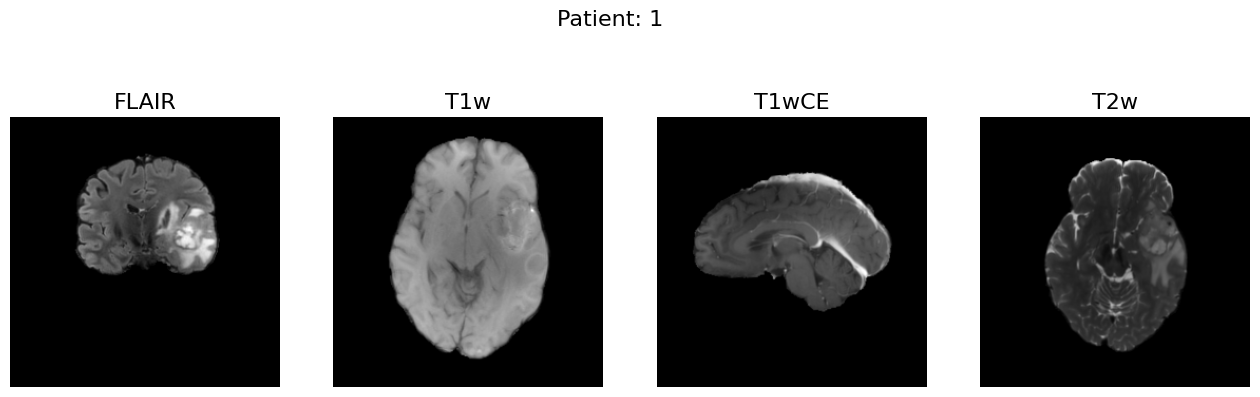

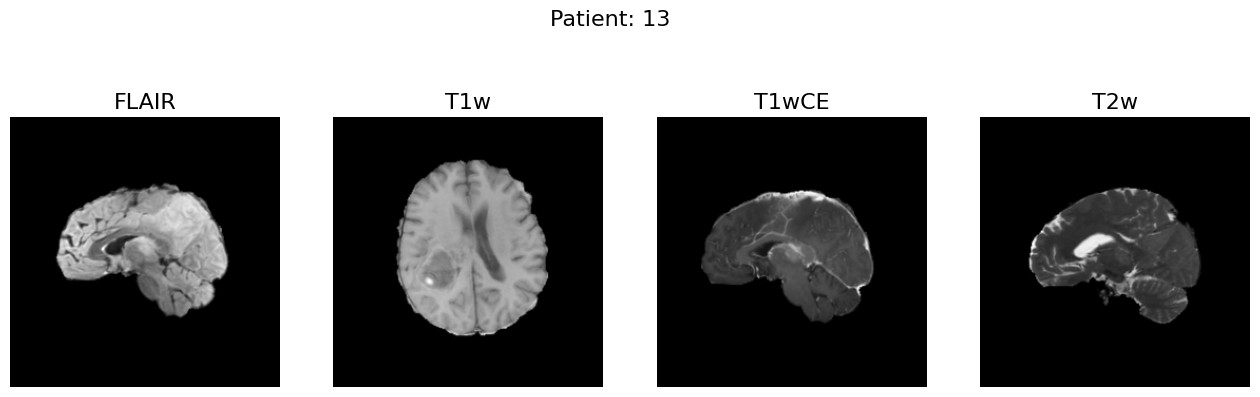

In [14]:
for i in [1, 13]:
  visualize_sample(brats21id=i, slice_i=0.5)

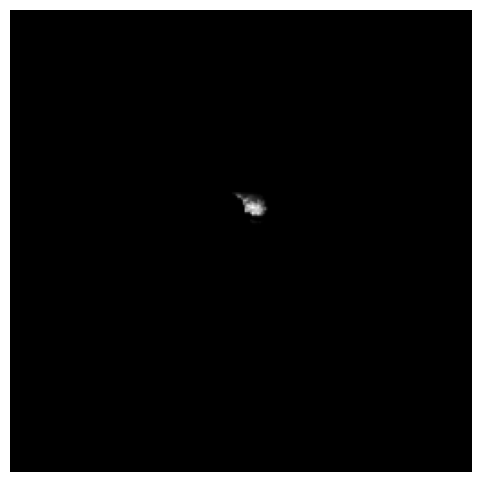

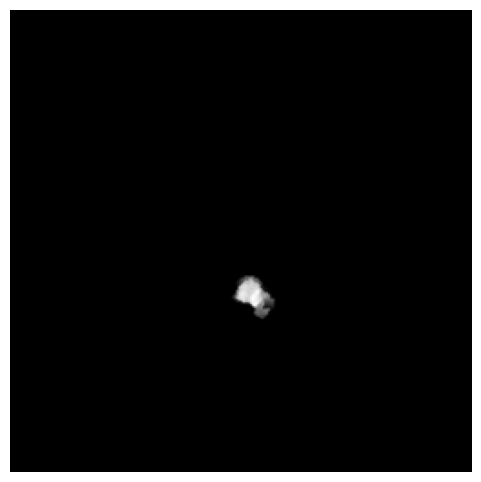

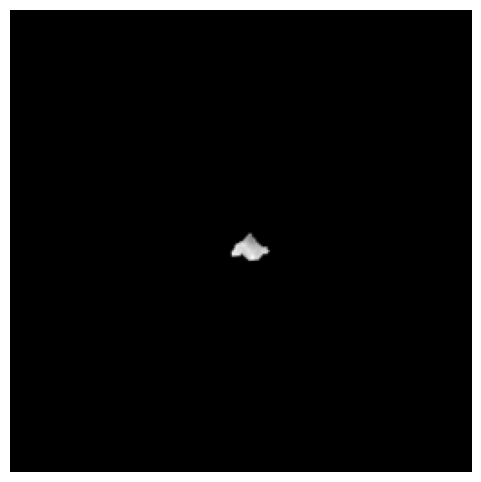

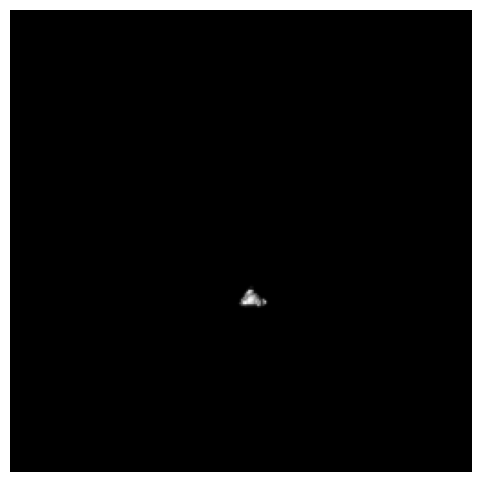

In [15]:
def create_animation(ims):
    fig = plt.figure(figsize=(6, 6))
    plt.axis('off')
    im = plt.imshow(ims[0], cmap="gray")
    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames = len(ims), interval = 1000//24)

from IPython.display import clear_output
animations = dict()
for t in ("FLAIR", "T1w", "T1wCE", "T2w"):
    images = load_dicom_line(os.path.join(CFG.data_root, 'test', '00001', t))
    animations[t] = create_animation(images)
    clear_output()

In [16]:
animations['FLAIR']

### Generate fused MRI sequences

To manage the temporal dimension of MRI sequences effectively, a uniform temporal subsampling strategy is employed. For a given MRI sequence with a total of T frames, a subset of 10 frames is selected to represent the sequence. This selection is made using uniform intervals to ensure a broad coverage of the entire sequence. For instance, in a video with 91 frames, frames numbered 1, 11, 21, ..., 91 are chosen. This approach ensures that the selected frames are evenly distributed, capturing the essential temporal dynamics of the MRI sequence.

Once the frames are selected, the next step involves the fusion of different MRI image types (e.g., FLAIR, T1w, T1wCE, T2) for each time frame. Specifically, 4 single-channel MRI images corresponding to the different types are concatenated to form a single 4-channel feature image. This multi-channel image serves as a comprehensive representation, incorporating various aspects of the brain's anatomy and pathology as captured by the different MRI modalities. It's not uncommon for certain MRI image types to be missing for a patient. In such cases, the missing image channels are filled with zeros. This approach ensures that the resulting 4-channel feature image maintains a consistent format across all patients, facilitating the training and inference phases of the deep learning model. By filling missing channels with zeros, the model can recognize and account for the absence of certain image types without disrupting the analysis process.

![preprocess](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/brain-input_processing.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)

Solution source: https://www.kaggle.com/competitions/rsna-miccai-brain-tumor-radiogenomic-classification/discussion/280033

In [17]:
def uniform_temporal_subsample(x, num_samples):
    '''
        Args:
            x: input list
            num_samples: The number of equispaced samples to be selected
        Returns:
            Output list
    '''
    t = len(x)
    indices = torch.linspace(0, t - 1, num_samples)
    indices = torch.clamp(indices, 0, t - 1).long()
    return [x[i] for i in indices]

class TestDataRetriever(Dataset):
    def __init__(self, paths, transform=None):
        self.paths = paths
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def read_video(self, vid_paths):
        video = [load_dicom(path) for path in vid_paths]
        if len(video)==0:
            video = torch.zeros(CFG.n_frames, CFG.img_size, CFG.img_size)
        else:
            video = torch.stack(video) # T * C * H * W
        return video

    def __getitem__(self, index):
        _id = self.paths[index]
        patient_path = os.path.join(CFG.data_root, "test", str(_id).zfill(5))
        channels = []
        for t in ["FLAIR","T1w", "T1wCE", "T2w"]:
            t_paths = sorted(
                glob.glob(os.path.join(patient_path, t, "*")),
                key=lambda x: int(x[:-4].split("-")[-1]),
            )
            num_samples = CFG.n_frames
            if len(t_paths) < num_samples:
                in_frames_path = t_paths
            else:
                in_frames_path = uniform_temporal_subsample(t_paths, num_samples)

            channel = self.read_video(in_frames_path)
            if channel.shape[0] == 0:
                print("1 channel empty")
                channel = torch.zeros(num_samples, CFG.img_size, CFG.img_size)
            channels.append(channel)

        channels = torch.stack(channels).transpose(0,1)
        return {"X": channels.float(), "id": _id}

## CNN-LSTM architecture

The architecture integrates a CNN model for the extraction of image features, specifically utilizing a pre-trained EfficientNet B0 model. Given the unique requirement of processing 4-channel MRI images, a 2D convolution layer is employed to transform these 4-channel inputs into a 3-channel feature map. This adaptation ensures compatibility with the EfficientNet model's input specifications. Additionally, the original classification head of the EfficientNet model is substituted with a custom fully-connected layer, designed with 256 nodes to tailor the model's output to the specific needs of the task.

Following the feature extraction phase, the model leverages LSTM layers to analyze temporal dependencies within the data. Specifically, embeddings from 10 carefully selected frames undergo processing by two LSTM layers, each configured with a hidden size of 32. This sequential processing culminates in a prediction layer, consisting of a single node, which outputs a score indicative of the model's inference.

The training regimen for this architecture spans 15 epochs, employing a binary cross-entropy loss function to quantify the model's performance. Optimization is facilitated through the use of the Adam optimizer, set with a learning rate of 1e-4.

![preprocess](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/brain-model.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)

Solution source: https://www.kaggle.com/competitions/rsna-miccai-brain-tumor-radiogenomic-classification/discussion/280033

In [18]:
class CNN(nn.Module):
    def __init__(self, checkpoint_path):
        super().__init__()
        self.map = nn.Conv2d(in_channels=4, out_channels=3, kernel_size=1)
        self.net = efficientnet_pytorch.EfficientNet.from_name("efficientnet-b0")
        if checkpoint_path:
            checkpoint = torch.load(checkpoint_path)
            self.net.load_state_dict(checkpoint)

        n_features = self.net._fc.in_features
        self.net._fc = nn.Linear(in_features=n_features, out_features=CFG.cnn_features, bias=True)

    def forward(self, x):
        x = F.relu(self.map(x))
        out = self.net(x)
        return out

class Model(nn.Module):
    def __init__(self, cnn_path=None):
        super().__init__()
        self.cnn = CNN(cnn_path)
        self.rnn = nn.LSTM(CFG.cnn_features, CFG.lstm_hidden, 2, batch_first=True)
        self.fc = nn.Linear(CFG.lstm_hidden, 1, bias=True)

    def forward(self, x):
        # x shape: BxTxCxHxW
        batch_size, timesteps, C, H, W = x.size()
        c_in = x.view(batch_size * timesteps, C, H, W)
        c_out = self.cnn(c_in)
        r_in = c_out.view(batch_size, timesteps, -1)
        output, (hn, cn) = self.rnn(r_in)

        out = self.fc(hn[-1])
        return out

### Cross validation
Stratified K-fold cross validation is used with K=5 on MGMT value. During inference time, the mean prediction value from all 5 models is used as the ensemble’s prediction value.

The model weights can be found [here](https://www.kaggle.com/code/minhnhatphan/rnsa-21-cnn-lstm-train/output).

In [20]:
models = []
for i in range(1, CFG.n_fold+1):
    model = Model()
    model.to(device)
    if torch.cuda.is_available():
      checkpoint = torch.load(f"{MODELS_FOLDER}/best-model-{i}.pth", weights_only=False)
    else:
      checkpoint = torch.load(f"{MODELS_FOLDER}/best-model-{i}.pth", weights_only=False, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint["model_state_dict"])
    model.eval()

    models.append(model)

In [22]:
test_data_retriever = TestDataRetriever(
    [1,   13]
)

test_loader = torch_data.DataLoader(
    test_data_retriever,
    batch_size=4,
    shuffle=False,
    num_workers=2,
)

In [23]:
y_pred = []
ids = []

for e, batch in enumerate(test_loader):
    print(f"{e}/{len(test_loader)}", end="\r")
    with torch.no_grad():
        tmp_pred = np.zeros((batch["X"].shape[0], ))
        for model in models:
            tmp_res = torch.sigmoid(model(batch["X"].to(device))).cpu().numpy().squeeze()
            tmp_pred += tmp_res

        tmp_pred = tmp_pred/len(models)
        y_pred.extend(tmp_pred)
        ids.extend(batch["id"].numpy().tolist())

In [24]:
prediction = pd.DataFrame({"BraTS21ID": ids, "MGMT_value": y_pred})
prediction.head()

BraTS21ID  MGMT_value
0          1    0.553901
1         13    0.554463

# Part 2: Data integration strategies - multimodal data fusion

In part 2 of this notebook, we are going to learn about different fusion techniques.

### What is Multimodal Data Fusion?

Multimodal Data Fusion is a sophisticated technique that integrates data from diverse sources or modalities, such as text, images, and sensor data, to enhance the decision-making capabilities of machine learning models. This approach capitalizes on the complementary strengths of different data types, offering a more holistic understanding of the subject matter, which in turn improves the accuracy and robustness of predictive models.

### Significance in Machine Learning

The fusion of multimodal data enables machine learning models to access a broader and richer feature set than what unimodal data could provide. This enriched data context leads to more nuanced insights and predictions across various applications. For instance, in healthcare, combining clinical notes, lab results, and medical imaging can offer a comprehensive patient overview, aiding in more accurate diagnoses and treatment plans. Similarly, autonomous vehicles rely on a blend of visual, radar, and lidar data to navigate and make decisions, showcasing the critical role of multimodal data fusion in enhancing operational safety and efficiency.

### Approaches to Multimodal Data Fusion


**Early Fusion:** This strategy involves merging features from different modalities at the data level before inputting them into the model. While straightforward, early fusion might not fully capture the intricate interactions between modalities.

**Late Fusion:** This approach trains separate models for each modality and combines their predictions at the decision level. Late fusion respects the uniqueness of each data type but may miss out on capturing deeper intermodal relationships.

**Intermediate fusion:** Process each modality separately into a latent representation, fuse them, and then process the fused representation.

**Hybrid Fusion:** A combination of early and late fusion techniques, hybrid fusion aims to leverage intermediate representations to capture both intra-modal and intermodal dynamics effectively.

![fusion](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/mmdf.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)



# Part 3: Multimodal Data Fusion Using Embeddings

In this part we will be using [Recipes5k dataset](http://www.ub.edu/cvub/recipes5k/). It comprises 4,826 recipes featuring images and corresponding ingredient lists, with 3,213 unique ingredients simplified from 1,014 by removing overly-descriptive particles, offering a diverse collection of alternative preparations for each of the 101 food types from Food101, meticulously balanced across training, validation, and test splits. The dataset addresses intra- and inter-class variability, extracted from Yummly with 50 recipes per food type.

![food](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/food.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)

In [25]:
!git clone https://github.com/majsylw/Foundational-Multimodal-Fusion-Benchmark.git
#!pip install -r Foundational-Multimodal-Fusion-Benchmark/requirements.txt

import sys
sys.path.append('Foundational-Multimodal-Fusion-Benchmark')

# imports

import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

Cloning into 'Foundational-Multimodal-Fusion-Benchmark'...
remote: Enumerating objects: 2105, done.
remote: Counting objects: 100% (344/344), done.
remote: Compressing objects: 100% (273/273), done.
remote: Total 2105 (delta 96), reused 305 (delta 71), pack-reused 1761 (from 1)
Receiving objects: 100% (2105/2105), 1.06 GiB | 37.39 MiB/s, done.
Resolving deltas: 100% (724/724), done.
Updating files: 100% (535/535), done.


In [26]:
PATH = 'Foundational-Multimodal-Fusion-Benchmark/Embeddings/Recipes5k/'
COLUMN = 'embeddings'
text_path = 'text_embeddings-short.csv'
images_path = 'Embeddings_dinov2_base-short.csv'
#text_path = 'text_embeddings.csv'
#images_path = 'Embeddings_dinov2_base.csv'

In [27]:
text = pd.read_csv(os.path.join(PATH, text_path))
#text = pd.read_csv(os.path.join(HOME_FOLDER, text_path))
images = pd.read_csv(os.path.join(PATH, images_path))

# Merge and preprocess the datasets
df = preprocess_data(text, images, "image", "ImageName")
df.to_csv(os.path.join(PATH, 'embeddings.csv'), index=False)
df.head()

S: check str


Unnamed: 0_x        class  split  \
0             0  onion_rings    val   
1             1  onion_rings  train   
2             2  onion_rings  train   
3             3  onion_rings  train   
4             4  onion_rings  train   

                                         ingredients    text_1    text_2  \
0  yellow onion,flour,baking powder,seasoning sal...  1.102814 -1.501368   
1  white onion,panko,cornmeal,ground paprika,onio...  0.251045 -0.848766   
2  yellow onion,all-purpose flour,baking powder,l...  0.682453 -1.090896   
3                      oil,pancake mix,spanish onion  2.340018 -5.028918   
4  peanut oil,sweet onion,flour,eggs,celery salt,...  2.398075  0.459919   

     text_3    text_4    text_5    text_6  ...  image_758  image_759  \
0 -0.301835 -1.239182 -0.910469 -0.634073  ...   0.145026  -0.173223   
1 -0.742973 -1.274160 -2.171595  0.156482  ...   1.585758   1.397843   
2  0.987037 -0.275286 -2.029299 -0.240013  ...   0.984198   1.104070   
3 -0.098210 -0.940332  0.413409 -1.502684  ...   0.464018   0.658732   
4 -3.518206  0.004030  0.575241  1.829353  ...   0.527386   0.913060   

   image_760  image_761  image_762  image_763  image_764  image_765  \
0  -1.631687  -1.373413  -1.700477   2.993020  -0.123423   0.482150   
1  -2.597118  -1.620306   1.528063  -1.035716   1.339101  -1.978144   
2  -2.185897   0.033494  -1.515771   2.490174  -1.488795   1.110195   
3  -1.866643  -0.403469  -0.583548   2.141593   0.015457   0.862089   
4  -2.255255   0.041726  -0.814133   1.396166   0.624918   0.262062   

   image_766  image_767  
0   0.335781   0.164388  
1  -0.381255  -0.014164  
2   0.044147   0.145058  
3  -1.321241   0.749305  
4  -0.816889  -1.154006  

[5 rows x 4869 columns]

In [28]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'class'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (72, 4869)
Test Shape: (16, 4869)


In [29]:
# Models
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

During the session we will be testing embeddings using early and late fusion approaches.
- Early Fusion Approach: Concatenate text and image embeddings, pass through a layer with 256 neurons, 0.2 dropout, ReLu Activation, and Batch Normalization. Connect to a classification layer.
- Late Fusion Approach: Process text and image embeddings with two layers each (128 neurons, ReLu activation, 0.2 dropout, and BatchNorm). Concatenate outputs and connect to a classification layer.

In [30]:
import torch.nn as nn


######### Models and Evaluation #########

# Early Fusion Model
class EarlyFusionModel(nn.Module):
    """
    Early Fusion Model for combining text and image features.

    Args:
    - text_input_size (int): Dimension of the text input.
    - image_input_size (int): Dimension of the image input.
    - output_size (int): Dimension of the output.
    - hidden (int or list): Hidden layer(s) size(s) for the model.

    Attributes:
    - fc1 (nn.Sequential): First fully connected layer(s).
    - fc2 (nn.Linear): Second fully connected layer.

    Methods:
    - forward(text, image): Forward pass of the model.

    Example:
    model = EarlyFusionModel(text_input_size=512, image_input_size=256, output_size=10, hidden=[128, 64])
    """
    def __init__(self, text_input_size, image_input_size, output_size, hidden=[128], p=0.2):
        super(EarlyFusionModel, self).__init__()

        self.p = p
        output_dim = text_input_size + image_input_size

        # Initialize layers as an empty list
        layers = []

        # Add the linear layer and ReLU activation if 'hidden' is an integer
        if isinstance(hidden, int):
            layers.append(nn.Linear(output_dim, hidden))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=self.p))

            output_dim = hidden

        # Add the linear layer and ReLU activation for each element in 'hidden' if it's a list
        elif isinstance(hidden, list):
            for h in hidden:
                layers.append(nn.Linear(output_dim, h))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(p=self.p))
                layers.append(nn.BatchNorm1d(h))
                output_dim = h

        self.fc1 = nn.Sequential(*layers)

        self.fc2 = nn.Linear(output_dim, output_size)

    def forward(self, text, image):
        # Early concatenation
        x = torch.cat((text, image), dim=1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Late Fusion Model
class LateFusionModel(nn.Module):
    """
    Late Fusion Model for combining text and image features.

    Args:
    - text_input_size (int): Dimension of the text input.
    - image_input_size (int): Dimension of the image input.
    - output_size (int): Dimension of the output.
    - hidden_images (int or list): Hidden layer(s) size(s) for the image features.
    - hidden_text (int or list): Hidden layer(s) size(s) for the text features.

    Attributes:
    - text_fc (nn.Sequential): Fully connected layers for text features.
    - image_fc (nn.Sequential): Fully connected layers for image features.
    - fc2 (nn.Linear): Second fully connected layer.

    Methods:
    - forward(text, image): Forward pass of the model.

    Example:
    model = LateFusionModel(text_input_size=512, image_input_size=256, output_size=10, hidden_images=[64], hidden_text=[64])
    """
    def __init__(self, text_input_size, image_input_size, output_size, hidden_images=[64], hidden_text=[64], p=0.2):
        super(LateFusionModel, self).__init__()

        self.p = p

        self.text_fc, out_text = self._get_layers(text_input_size, hidden_text, p=self.p)
        self.image_fc, out_images = self._get_layers(image_input_size, hidden_images, p=self.p)

        self.fc2 = nn.Linear(out_text + out_images, output_size)

    def _get_layers(self, embed_dim, hidden, p=0.2):
        # Initialize layers as an empty list
        layers = []
        output_dim = embed_dim

        # Add the linear layer and ReLU activation if 'hidden' is an integer
        if isinstance(hidden, int):
            layers.append(nn.Linear(output_dim, hidden))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=p))

            output_dim = hidden

        # Add the linear layer and ReLU activation for each element in 'hidden' if it's a list
        elif isinstance(hidden, list):
            for h in hidden:
                layers.append(nn.Linear(output_dim, h))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(p=p))
                layers.append(nn.BatchNorm1d(h))
                output_dim = h

        fc = nn.Sequential(*layers)

        return fc, output_dim

    def forward(self, text, image):
        text_output = self.text_fc(text)
        image_output = self.image_fc(image)
        # Late concatenation
        x = torch.cat((text_output, image_output), dim=1)
        x = self.fc2(x)
        return x

Training Early Fusion Model:
Model Memory Usage: 2.38 MB
The number of parameters of the model are: 623363
Epoch 1/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 1/15 - Training Time: 0.37 seconds | Inference Time: 0.26 seconds
Epoch 2/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 2/15 - Training Time: 0.24 seconds | Inference Time: 0.22 seconds
Epoch 3/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 3/15 - Training Time: 0.27 seconds | Inference Time: 0.23 seconds
Epoch 4/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 4/15 - Training Time: 0.26 seconds | Inference Time: 0.22 seconds
Epoch 5/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 5/15 - Training Time: 0.26 seconds | Inference Time: 0.22 seconds
Epoch 6/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 6/15 - Training Time: 0.25 seconds | Inference Time: 0.22 seconds
Epoch 7/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 7/15 - Training Time: 0.25 seconds | Inference Time: 0.21 seconds
Epoch 8/15 - Test 

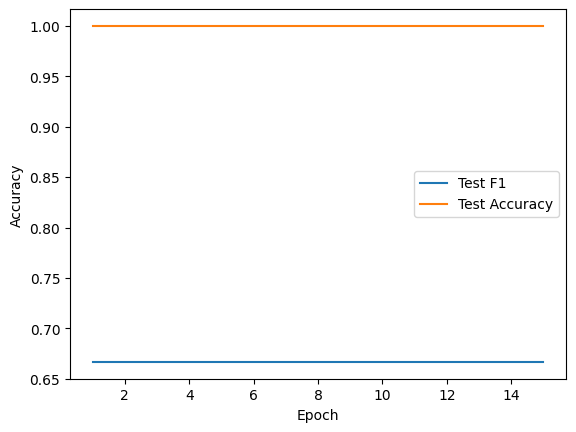

In [34]:
# Train early fusion model
print("Training Early Fusion Model:")

train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=False, p=0.2)

Training Late Fusion Model:
Model Memory Usage: 1.19 MB
The number of parameters of the model are: 312067
Epoch 1/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 1/15 - Training Time: 0.42 seconds | Inference Time: 0.22 seconds
Epoch 2/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 2/15 - Training Time: 0.37 seconds | Inference Time: 0.21 seconds
Epoch 3/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 3/15 - Training Time: 0.15 seconds | Inference Time: 0.12 seconds
Epoch 4/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 4/15 - Training Time: 0.15 seconds | Inference Time: 0.13 seconds
Epoch 5/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 5/15 - Training Time: 0.17 seconds | Inference Time: 0.13 seconds
Epoch 6/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 6/15 - Training Time: 0.15 seconds | Inference Time: 0.14 seconds
Epoch 7/15 - Test Accuracy: 1.0000, macro-f1: 0.6667
Epoch 7/15 - Training Time: 0.16 seconds | Inference Time: 0.13 seconds
Epoch 8/15 - Test A

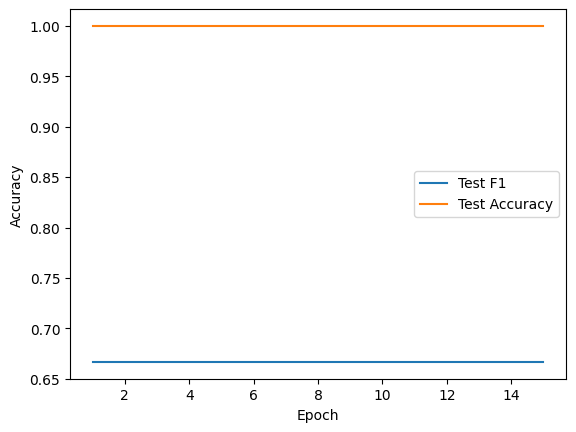

In [33]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=False, p=0.2)

# That's the end of the notebook!

Here is the list of extra resources:
1. [The RSNA-ASNR-MICCAI BraTS 2021 Benchmark on Brain Tumor Segmentation and Radiogenomic Classification](https://arxiv.org/abs/2107.02314)
2. [Multimodal data fusion – analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10007548/)
3. [Fusion of Multi-Modal Data Stream for Clinical Event Prediction - Imon Banerjee, PhD](https://www.youtube.com/watch?v=3DroMVNb2vg)
4. [Data-Efficient Multimodal Fusion on a Single GPU](https://arxiv.org/pdf/2312.10144.pdf)
5. [Integrated multimodal artificial intelligence framework for healthcare applications](https://www.nature.com/articles/s41746-022-00689-4)
6. [Inferring multimodal latent topics from electronic health records](https://www.nature.com/articles/s41467-020-16378-3)
7. [Multimodal Risk Prediction with Physiological Signals, Medical Images and Clinical Notes](https://www.medrxiv.org/content/10.1101/2023.05.18.23290207v1)